In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
df = pd.read_csv("Resources/Autism.csv")
# # Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [3]:
df = df.drop(columns=['Case No', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence', 'Used_App_Before',
                      'Screening Type', 'Language', 'User'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Class
0,0,0,0,0,0,0,0,0,0,0,27,0,NO
1,1,1,1,1,1,1,1,1,1,1,21,10,YES
2,1,1,0,1,1,0,0,1,0,0,18,5,NO
3,1,0,0,0,1,1,1,1,1,1,49,7,YES
4,1,1,1,0,0,0,0,1,0,0,18,4,NO


In [4]:
df = pd.get_dummies(df)
df = df.drop(columns=['Class_NO'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Class_YES
0,0,0,0,0,0,0,0,0,0,0,27,0,0
1,1,1,1,1,1,1,1,1,1,1,21,10,1
2,1,1,0,1,1,0,0,1,0,0,18,5,0
3,1,0,0,0,1,1,1,1,1,1,49,7,1
4,1,1,1,0,0,0,0,1,0,0,18,4,0


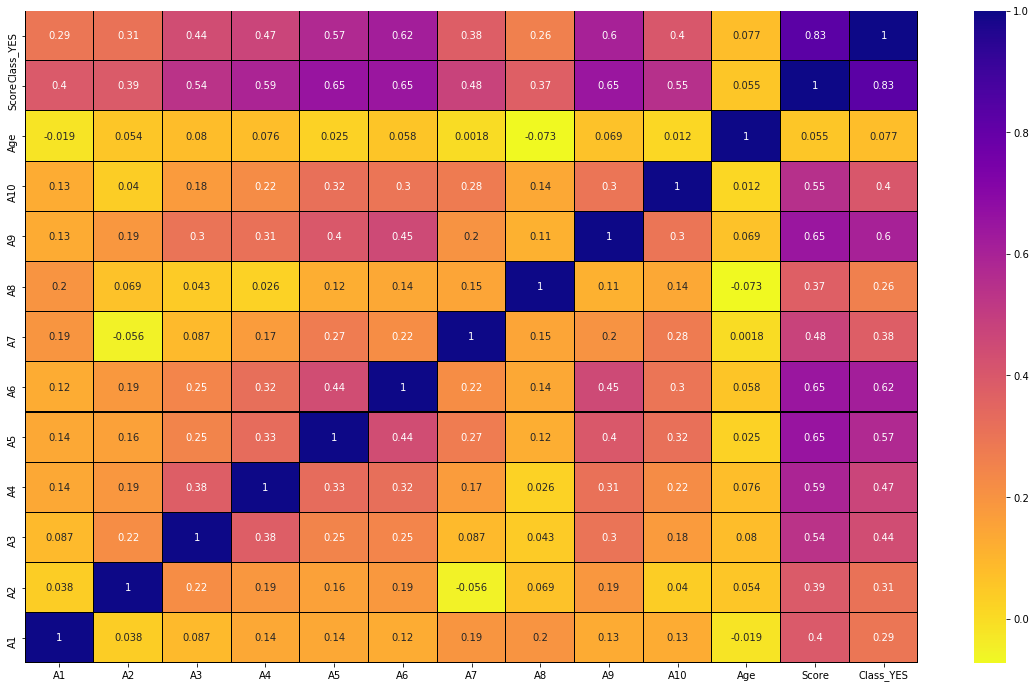

In [5]:
# Make the heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))

ax=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="plasma_r", linewidths=.1,
              linecolor='black')
ax.set_ylim(0, 13)

# Save image
plt.savefig(os.path.join("Images", "HeatMap.png"))

# Colors I like:
# plasma_r, spring_r, tab10, viridis_r

## Observations
--------

One thing we can do with a heatmap is to compare inputs.  For example, questions A9 and A6 correlate similarly to 'Class_YES', at 0.6 and 0.62.  But if we compare questions A9 and A6 to *each other,* they have a weak correlation of 0.45.  This means that they're, stastically speaking, likely independent variables and we want to keep *both* of them as inputs.  All of the AQ-10 questions are weak classifiers, but together they're strong.

All of the AQ-10 question correlations to 'Class_YES fall between 0.29 and 0.62.  Again, this speaks to being weak classifiers on their own, but strong classifiers as a whole.

Going along the same lines, let's look at age.  Age appears to be a weak classifier.  But looking at feature importance weights, age did rank in the top 11 with the 10 questions plus score.  But removing it from the inputs only had minimal impact on the score.  So maybe even though it weighted at a similar correlation to say question 8, perhaps it's how all the questions correlate *together*.

There are three negative classifiers (Age and A1, A2 and A7, Age and A8).  This correlations are small, the largest being abs(-.073).  Negative correlation would just mean, for example, with Age and A1.  If someone answered '0' for A1, as the age increased, they might be more likely to answer with a 1.  But again, very small correlation, nothing to spend much time on.

Not surprisingly, score had a very high correlation to 'Class_YES'.